In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('people.csv')

In [3]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [4]:
#data cleaning
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
df.shape

(11991, 10)

In [18]:
df.duplicated().sum()

0

In [19]:
duplicate_df=df[df.duplicated()]

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(11991, 10)

In [23]:
#visualisation
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\1724451716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12644\1346765403.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="Greens")


<Axes: >

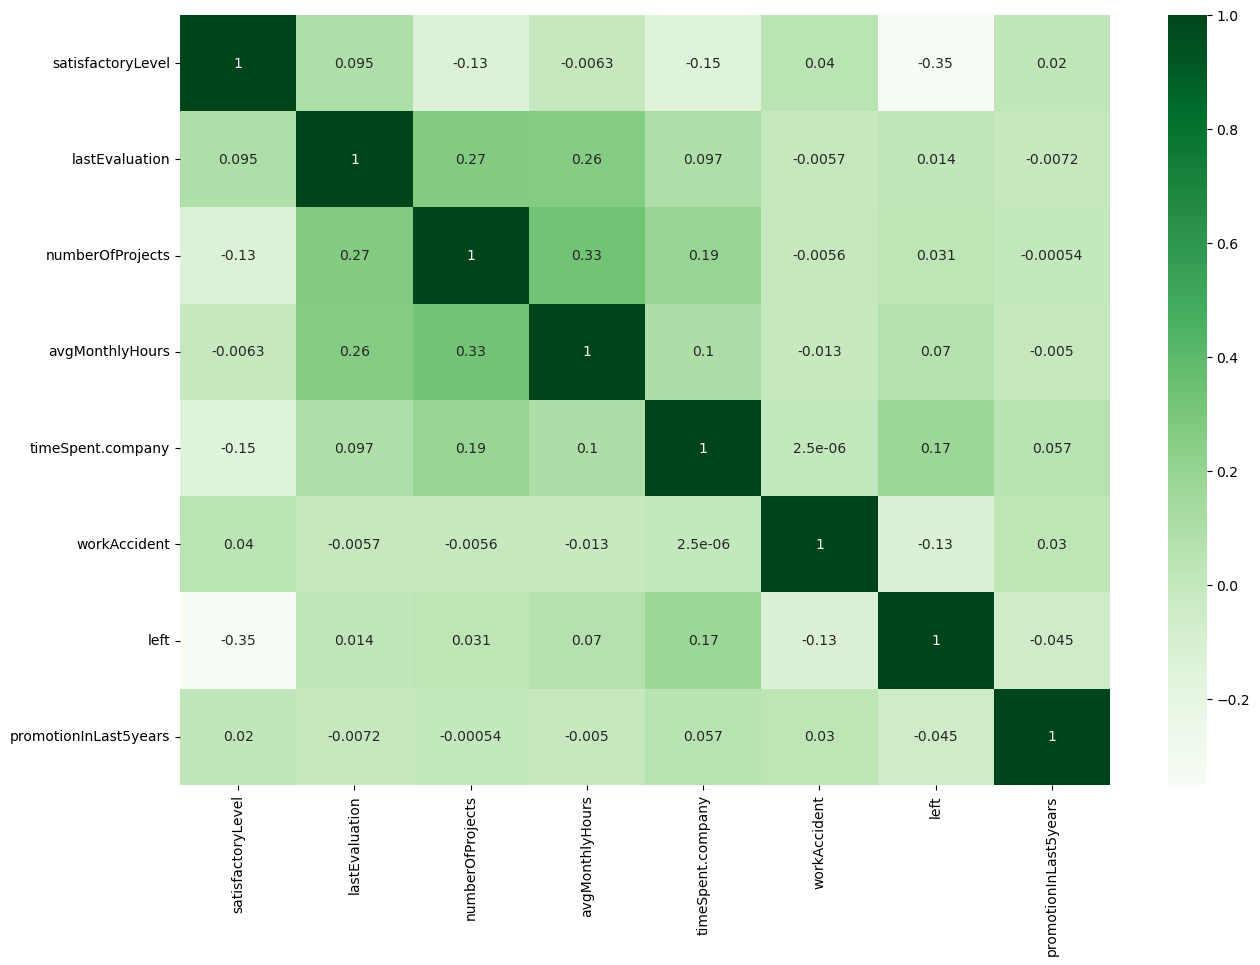

In [26]:
#
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="Greens")

In [27]:
# 0.7 - 1 --->highly correlation
# 0.4 - 0.6 ---->moderate correlation
# 1 - 3 --->low correlation

# 0 ---> No correlation

# same pattern for negative correlation

In [28]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

<Axes: xlabel='numberOfProjects', ylabel='count'>

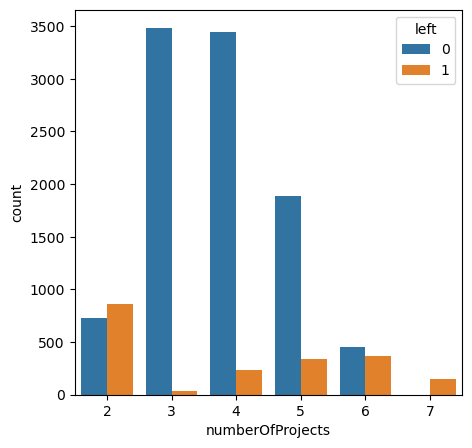

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="numberOfProjects",hue='left')

In [31]:
# inference = people who are getting less project(i.e 2 projects) and the people who are getting overload project (i;e 7)
# are leaving the organistion
# suggestion =  I think project from 7 project people should be redistributed to people with 2 project(assign 2-3 project each)

<Axes: xlabel='avgMonthlyHours', ylabel='count'>

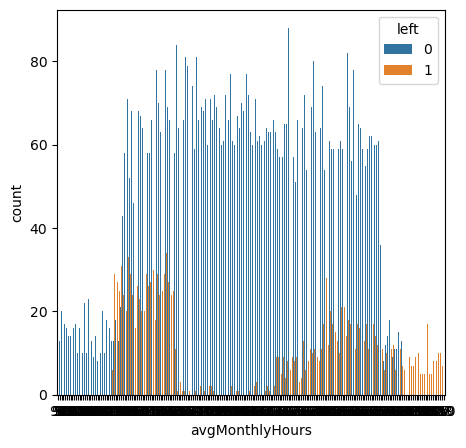

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="avgMonthlyHours",hue='left')   #nothing can be inference from this

<Axes: xlabel='timeSpent.company', ylabel='count'>

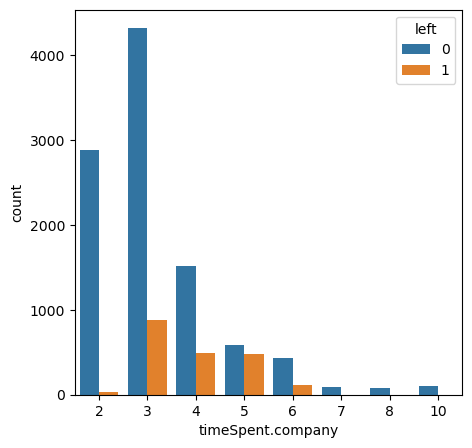

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="timeSpent.company",hue='left')

In [37]:
#inference- people leave the orginisation after experiance of 3-5 years   
#suggestion - once they complete 4-5 years, then they should be given supervisory roles for project with in experienced ones
#working under them giving the role based incentives or increments

<Axes: xlabel='workAccident', ylabel='count'>

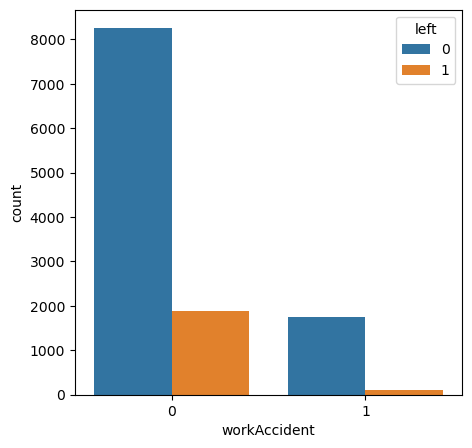

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="workAccident",hue='left')

In [39]:
# inference---> employees are not leaving just beccause of conflict
# suggestion---> nill

<Axes: xlabel='promotionInLast5years', ylabel='count'>

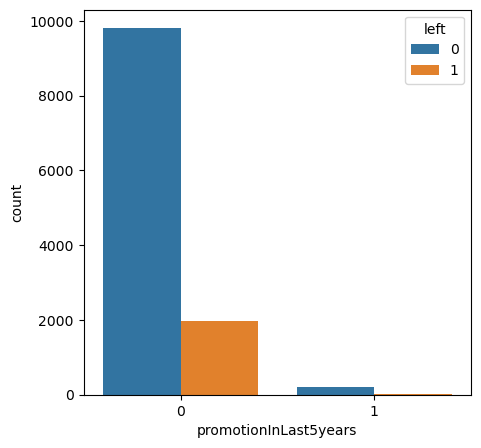

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="promotionInLast5years",hue='left')

In [41]:
# inference ---> people who are not have promotion in last 5 year are leaving 
# suggestion ----> HR should provide time to time promotion to th eemployees

<Axes: xlabel='dept', ylabel='count'>

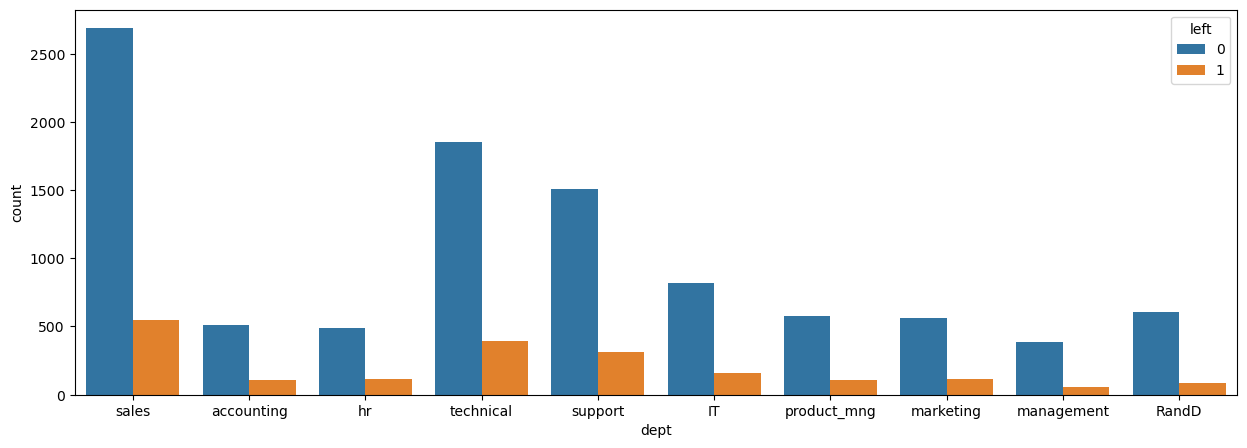

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="dept",hue='left')

In [43]:
# inference ---> people of sales, technical, support are leaving the company most
# suggestion ---> (1) give option to move other dept
#                  (2) incentive 
#                  (3)for better team managment team meeting to discuss whatever problem employees are facing 
#                   (4) taking for team outing, lunch, for recreational activity and reduce stress level

<Axes: xlabel='salary', ylabel='count'>

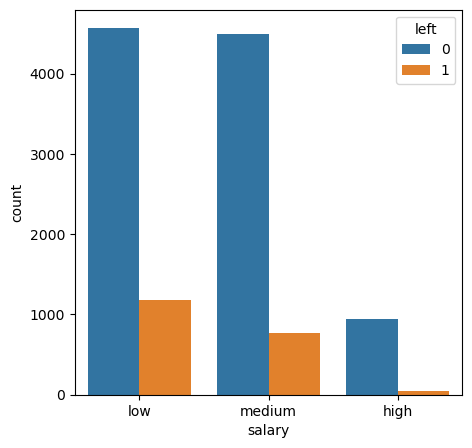

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="salary",hue='left')

In [ ]:
inference---> employees with low/medium salary are leaving most 
suggestion ----> Regular salary hikes according to the exprience 
salary hike + promotion + incentive + project changes